# Setup

In [1]:
# Common imports
import numpy as np
import os

# Make the notebook's output stable across runs
np.random.seed(42)

# Matplotlib setup
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import HTML, Image
from matplotlib.animation import FuncAnimation
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# For saving things
from joblib import dump, load

# Linear SVM Classification

# Soft Margin Classification

In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [4]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [6]:
# TODO - Plot the original data (what is and isn't the positive class)
# TODO - Plot the decision boundary of the svm_clf["linear_svc"] - 
#  SEE plot_svc_decision_boundary in the book's github

In [7]:
#LinearSVC??

# Nonlinear SVM Classification

Many data sets are not linearly separable.  Adding polynomial features can transform a data set that is not linearly separable into one that is.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# The book completely leaves out this and the plot of this.

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)



In [10]:
X

array([[ 1.61383833, -0.49115086],
       [ 0.08984723,  0.50439056],
       [ 0.74721047, -0.36911116],
       [-1.10174514,  0.23685641],
       [-0.72871455,  0.14652347],
       [-0.65891281,  0.857088  ],
       [ 0.22828266,  0.73453868],
       [ 1.39439184, -0.45063627],
       [ 0.87158283,  0.70852888],
       [ 0.88304472, -0.12658445],
       [ 0.38220326,  0.76957897],
       [-0.32279169,  0.92145523],
       [ 1.29900621, -0.64914275],
       [-0.63569974,  0.91873422],
       [ 1.96899387,  0.297549  ],
       [ 1.21073294,  0.37721455],
       [ 1.13998191, -0.36088456],
       [ 1.06805159, -0.53460667],
       [ 0.49598571,  0.66135542],
       [-0.26038715,  0.88295876],
       [-0.06516219,  0.13092506],
       [ 1.87005845, -0.18659309],
       [ 0.03146515,  0.79868048],
       [-1.03151461,  0.35788726],
       [ 0.45814234,  0.00308109],
       [ 0.40767679,  0.9574049 ],
       [-0.9379972 ,  0.46846678],
       [ 2.02675758,  0.09006383],
       [ 0.73867736,

In [11]:
X[:, 0]

array([ 1.61383833,  0.08984723,  0.74721047, -1.10174514, -0.72871455,
       -0.65891281,  0.22828266,  1.39439184,  0.87158283,  0.88304472,
        0.38220326, -0.32279169,  1.29900621, -0.63569974,  1.96899387,
        1.21073294,  1.13998191,  1.06805159,  0.49598571, -0.26038715,
       -0.06516219,  1.87005845,  0.03146515, -1.03151461,  0.45814234,
        0.40767679, -0.9379972 ,  2.02675758,  0.73867736,  0.71349755,
        0.92445501, -1.05805492,  1.80904221, -0.17181754,  2.22167197,
        0.8346617 ,  0.28332589,  0.40728969, -0.6303002 ,  0.59525613,
       -0.99578508, -0.45366574,  0.73645602,  2.10042161, -0.26764459,
        0.32384572,  1.59212445,  0.14332957,  0.31249817,  0.51814426,
       -0.22452786,  1.131632  ,  0.3723287 , -0.63902305,  0.82849531,
        1.3506206 ,  1.01195087,  0.35506156, -0.64970203,  1.60190251,
        0.27455847,  1.85601581,  0.12784118, -1.12470228,  0.04738364,
        0.67403854, -1.27201559,  0.79988167,  0.18258616,  2.40

In [12]:
X[:, 1]

array([-0.49115086,  0.50439056, -0.36911116,  0.23685641,  0.14652347,
        0.857088  ,  0.73453868, -0.45063627,  0.70852888, -0.12658445,
        0.76957897,  0.92145523, -0.64914275,  0.91873422,  0.297549  ,
        0.37721455, -0.36088456, -0.53460667,  0.66135542,  0.88295876,
        0.13092506, -0.18659309,  0.79868048,  0.35788726,  0.00308109,
        0.9574049 ,  0.46846678,  0.09006383,  0.52356398, -0.61055519,
        0.79897643,  0.1152524 , -0.49580332,  1.27111359, -0.16625369,
        0.34040713, -0.45537977, -0.10997402,  0.81437199,  0.93666607,
       -0.17956306,  0.88489567,  0.3315385 ,  0.33716789,  0.94669172,
        1.03101899, -0.40456525,  1.13048376, -0.41220505,  0.85146409,
        1.01733299,  0.21402176,  0.75960715,  0.71898449,  0.65051142,
       -0.20663883,  0.35059194, -0.57201701,  0.73792076, -0.10190367,
        0.01455085,  0.66573923,  0.7055097 ,  0.48332509,  0.50889219,
       -0.39105811,  0.064055  , -0.23860829, -0.07268884,  0.36

In [13]:
[y==0]

[array([False, False, False,  True,  True,  True,  True, False,  True,
         True,  True,  True, False,  True, False,  True, False, False,
         True,  True, False, False,  True,  True, False,  True,  True,
        False,  True, False,  True,  True, False,  True, False,  True,
        False, False,  True,  True,  True,  True,  True, False,  True,
         True, False,  True, False,  True,  True,  True,  True,  True,
         True, False,  True, False,  True, False, False, False, False,
         True, False, False,  True, False, False, False, False,  True,
        False,  True, False, False, False,  True, False, False, False,
        False,  True,  True,  True, False,  True,  True,  True, False,
        False, False, False, False,  True, False, False,  True, False,
        False])]

In [14]:
X[:, 0][y==0]

array([-1.10174514, -0.72871455, -0.65891281,  0.22828266,  0.87158283,
        0.88304472,  0.38220326, -0.32279169, -0.63569974,  1.21073294,
        0.49598571, -0.26038715,  0.03146515, -1.03151461,  0.40767679,
       -0.9379972 ,  0.73867736,  0.92445501, -1.05805492, -0.17181754,
        0.8346617 , -0.6303002 ,  0.59525613, -0.99578508, -0.45366574,
        0.73645602, -0.26764459,  0.32384572,  0.14332957,  0.51814426,
       -0.22452786,  1.131632  ,  0.3723287 , -0.63902305,  0.82849531,
        1.01195087, -0.64970203, -1.12470228, -1.27201559, -0.78027235,
       -0.94748558, -0.29808882, -0.81839086, -0.18600799,  0.82045555,
        0.23277362,  1.27522216, -0.04098885,  0.53409306,  0.51358597])

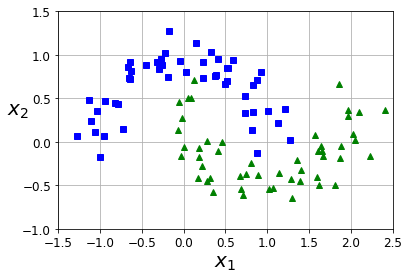

In [15]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

C:\Users\stidham\AppData\Local\Continuum\anaconda3\envs\envs\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

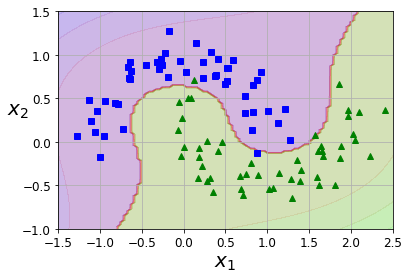

In [17]:
# From the book github

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

The _kernel trick_ : Get a result that would require a high degree polynomial model without having to add the features.

In [18]:
from sklearn.svm import SVC

In [19]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [20]:
# From book github

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

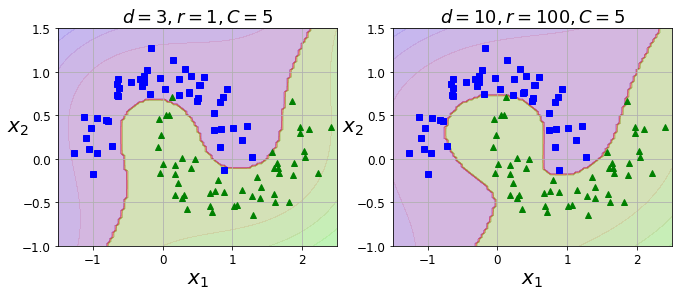

In [21]:
# From book github

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## Adding Similarity Features

Just like adding polynomial features is a way to transform a data set into something that is linear separable, so is the following technique.

Mark certain instances as _landmarks_ and define a _similarity_ function to determine how much each instance resembles a landmark.

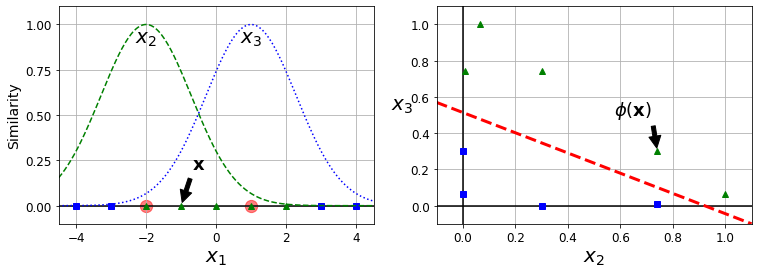

In [23]:
# From the book's github

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

#save_fig("kernel_method_plot")
plt.show()

Above on the left, the data is all on a straight line.  On the right, the data has been made linearly separable using a the following _Gaussian RBF_ similarity function.  The curves on the left graph are the new axes on the right graph.  Looking at the left graph the blue boxes will be low on one axis or the other, while the green triangles are high on both.


__Gaussian RBF similarity function__:

${\phi}_{\gamma}(X, \ell) = exp({\gamma}{\|x-\ell\|}^2)$

* $\ell$ is a landmark value
* $x$ is an instance value ($x_1$ on the right hand graph)
* $X$ is the matrix on instances
* $\gamma$ is hyperparameter
 * If your model is overfitting, then reduce it
 * If your model is underfitting, then increase it

How are landmarks selected?
* Create a landmark for every instance in the training set
* The transformed data set will have m features and m instances
 * Unless you keep the original features, in which case it will have more than m features

## Gaussian RBF Kernel

Just like the polynomial kernel, this kernel allows you to obtain results as though many similiarity features were added, but without actually adding them.

In [24]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

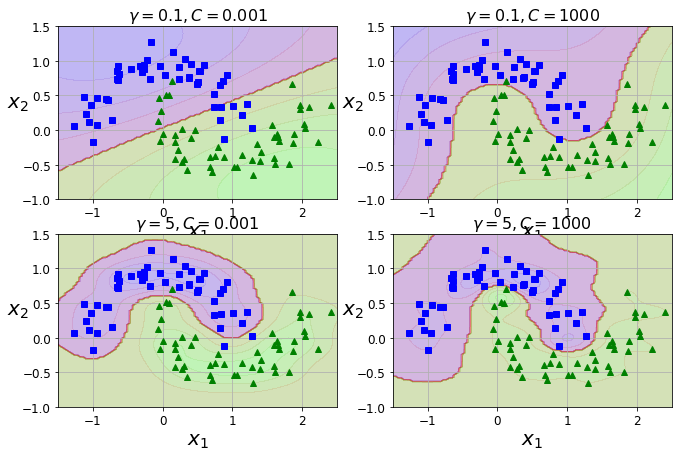

In [26]:
# From book github

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

#save_fig("moons_rbf_svc_plot")
plt.show()

# Computational Complexity